In [1]:
import evaluation 
import importlib
importlib.reload(evaluation)

<module 'evaluation' from '/Users/thomas/Documents/Master-Thesis/new_version/evaluation.py'>

In [2]:
from shallow_models.shallow_ensembles import RegressionEnsemble as ShallowEnsemble
import shallow_models
importlib.reload(shallow_models)

<module 'shallow_models' from '/Users/thomas/Documents/Master-Thesis/new_version/shallow_models/__init__.py'>

In [3]:
import ensembles
import networks
importlib.reload(networks)
import dataset_creation
import tensorflow as tf
import base
import numpy as np
#from shallow_models.shallow_ensembles import BootstrapEnsemble as ShallowBootstrap

In [4]:
trials = 3

num_neurons = [[10,10,10],[5,10,5],[10,5,10],[50,30,20],[1,1,1]]
seeds = [50,100,150,200,25]
num_layers = len(num_neurons[0])
learning_rates = np.arange(0.01,0.1,0.005)#np.arange(0.1,0.01,0.001)#
#AdamWOptimizer = tf.contrib.opt.extend_with_decoupled_weight_decay(tf.train.AdamOptimizer)


#tf.contrib.opt.AdamWOptimizer]
#tf.contrib.opt.NadamOptimizer
#learning_rates   = (learning_rates-min(learning_rates))/(max(learning_rates)-min(learning_rates))

activations = [[tf.nn.tanh]*num_layers,[tf.nn.leaky_relu]*num_layers, [tf.sigmoid]*num_layers,[tf.nn.relu]*num_layers]
initialisation_schemes = [tf.keras.initializers.he_normal, tf.contrib.layers.xavier_initializer] 
optimizers = [tf.contrib.opt.NadamOptimizer, tf.train.AdamOptimizer]#, tf.train.MomentumOptimizer]#,AdamWOptimizer]#, tf.contrib.opt.AdamWOptimizer]



param_grid = {'num_neurons': num_neurons,
              'activations':activations,
             'initialisation_scheme':initialisation_schemes,
             #'learning_rate':learning_rates,
              'optimizer':optimizers,
             'seed':seeds,
             'l2':[True,False]
             }


model_num_neurons = [30,50,30,10]
model_params = {
    'seed':50,
    'learning_rate':0.002,
    'num_neurons':model_num_neurons,
    'activations':[tf.nn.leaky_relu]*len(model_num_neurons),
    'optimizer': tf.contrib.opt.NadamOptimizer,
    'initialisation_scheme':tf.keras.initializers.he_normal, #tf.contrib.layers.xavier_initializer#
    #'l':0.05,
    
}
#thompson_model = networks.DropoutNetwork
#thompson_model = ensembles.BootstrapThroughTimeBobStrap
thompson_model=ensembles.BootstrapEnsemble
#thompson_model = ensembles.ForcedDiversityBootstrapThroughTime3

ds = dataset_creation.XThreeDataset
decay_factor = 1.5

In [5]:
learning_rates

array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 ,
       0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095])

In [6]:
tg = evaluation.ThompsonGridSearch(param_grid=param_grid, 
                                   dataset_creator=ds, 
                                   thompson_model=thompson_model,
                                   test_model=base.EnsembleNetwork,
                                  model_params=model_params,
                                  decay_factor=decay_factor)

initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>


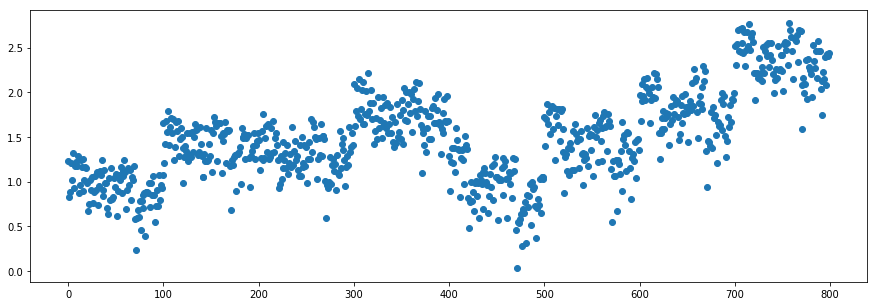

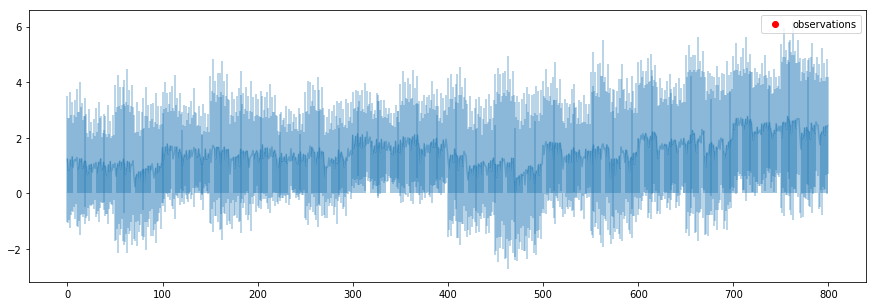

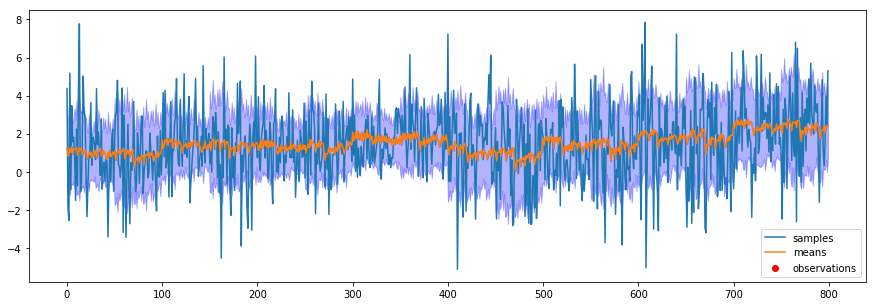

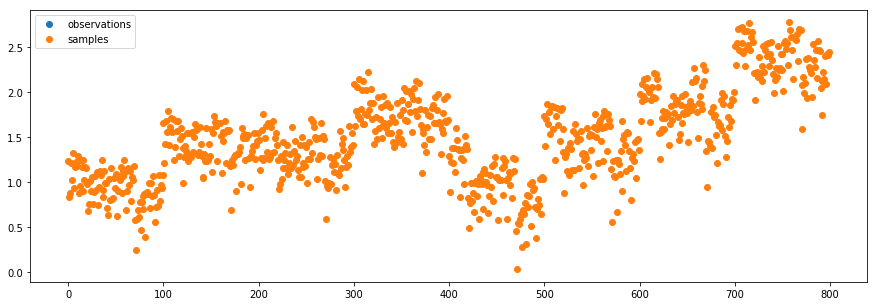

In [7]:
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 2)
new X is in there: True
new y is in there: True
mean probability is 1.0


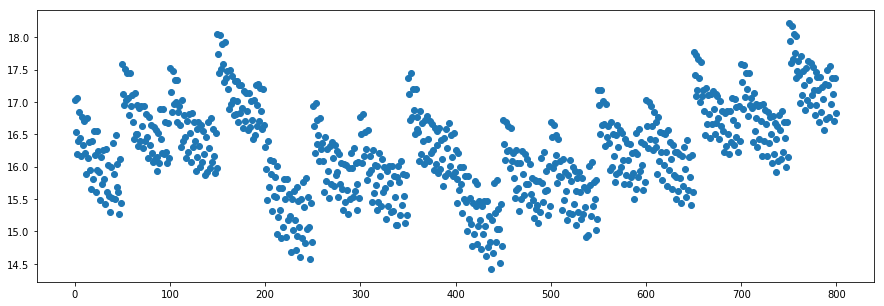

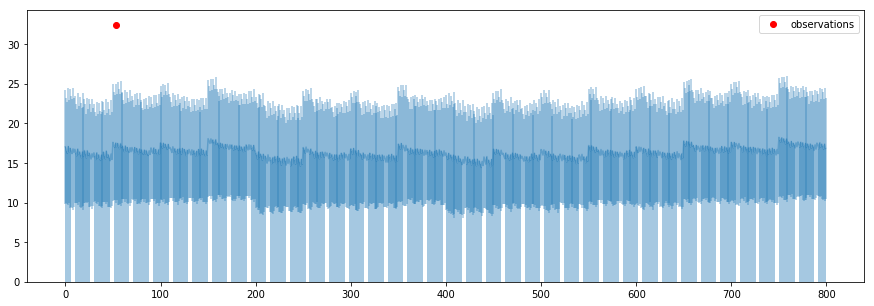

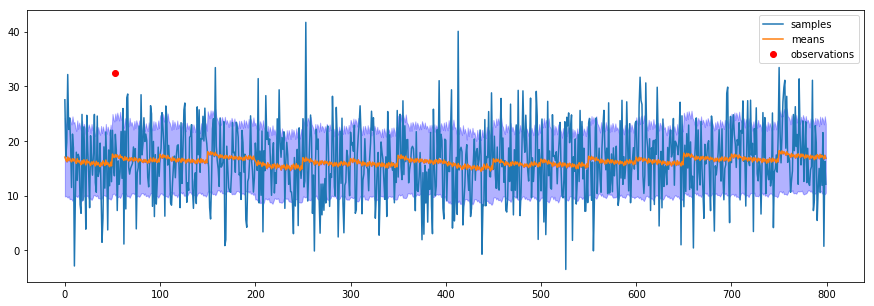

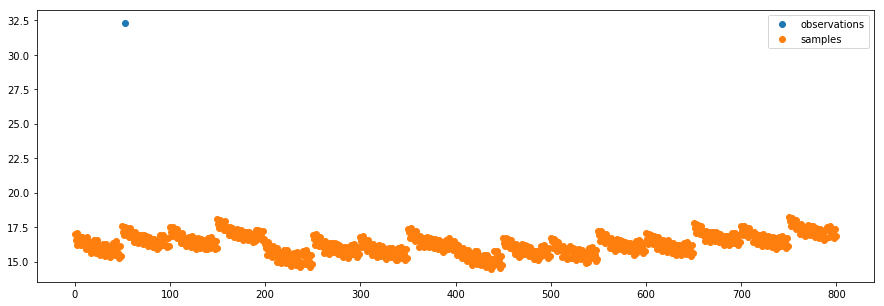

In [8]:
tg.goforit(1)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 2)
new X is in there: True
new y is in there: True
mean probability is 0.6666666666666666
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 2)
new X is in there: True
new y is in there: True
mean probability is 0.5
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 4)
new X is in there: True
new y is in there: True
mean probability is 0.8
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 4)
new X is in there: True
new y is in there: True
mean probability is 0.6666666666666666
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 4)
new X is in there: True
new y is in there: True
mean probability is 0.5714285714285714
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 5)
new X is in there: True
new y is in there: True
mean probability is 0.625

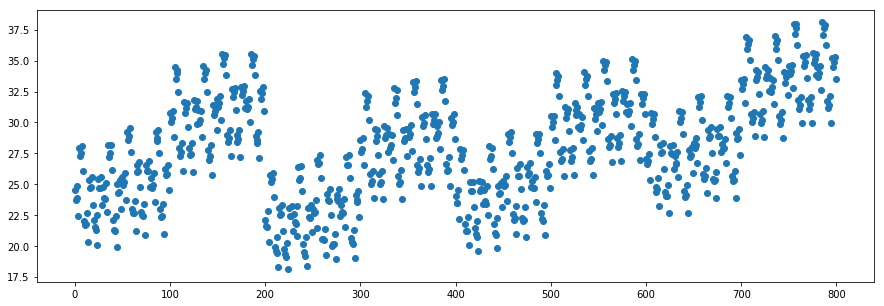

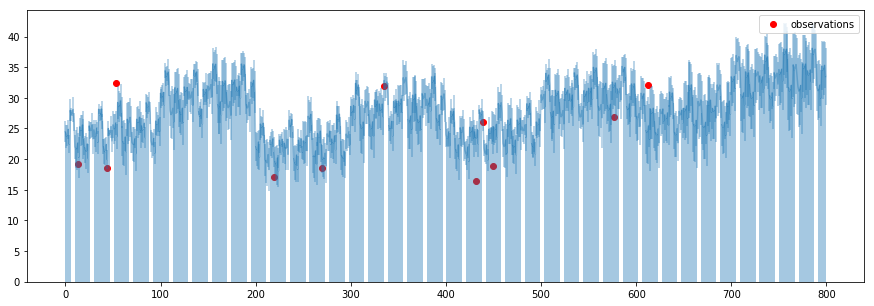

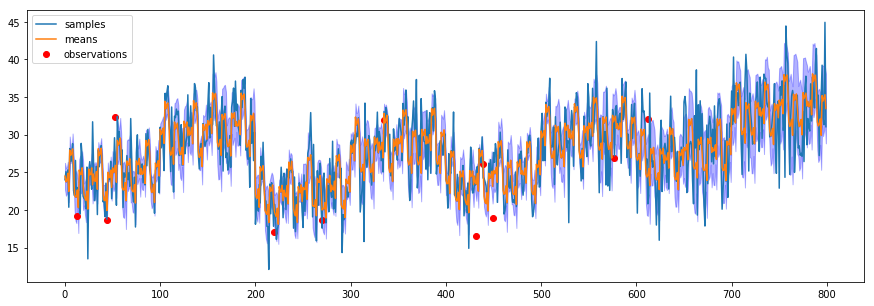

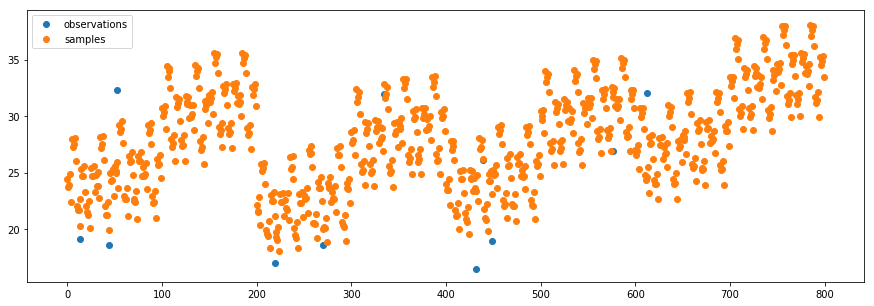

In [9]:
tg.goforit(10)
tg.plot_sample_grid()

In [10]:
tg.get_best_observation()

({'params': {'activations': [<function tensorflow.python.ops.nn_ops.leaky_relu(features, alpha=0.2, name=None)>,
    <function tensorflow.python.ops.nn_ops.leaky_relu(features, alpha=0.2, name=None)>,
    <function tensorflow.python.ops.nn_ops.leaky_relu(features, alpha=0.2, name=None)>],
   'initialisation_scheme': <function tensorflow.contrib.layers.python.layers.initializers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32)>,
   'l2': False,
   'num_neurons': [50, 30, 20],
   'optimizer': tensorflow.contrib.opt.python.training.nadam_optimizer.NadamOptimizer,
   'seed': 200},
  'score': 16.472639707508186,
  'X': array([[0],
         [0],
         [1],
         [0],
         [1],
         [0],
         [0],
         [1],
         [0],
         [0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [1],
         [0],
         [0],
         [0]], dtype=uint8)},
 {'params': {'activations': [<function tensorflow.python.ops.math_ops.s

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 10)
new X is in there: True
new y is in there: True
mean probability is 0.7692307692307693
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 10)
new X is in there: True
new y is in there: True
mean probability is 0.7142857142857143
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 8)
new X is in there: True
new y is in there: True
mean probability is 0.5333333333333333
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 9)
new X is in there: True
new y is in there: True
mean probability is 0.5625
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 13)
new X is in there: True
new y is in there: True
mean probability is 0.7647058823529411
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 10)
new X is in there: True
new y is in there: True
mea

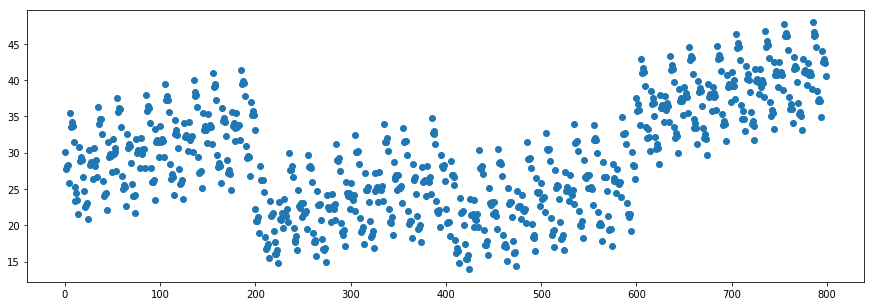

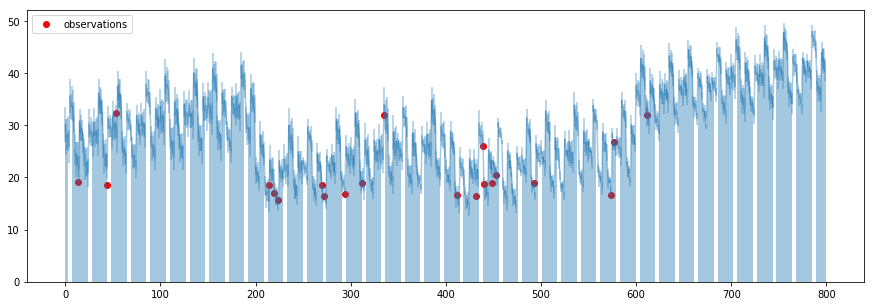

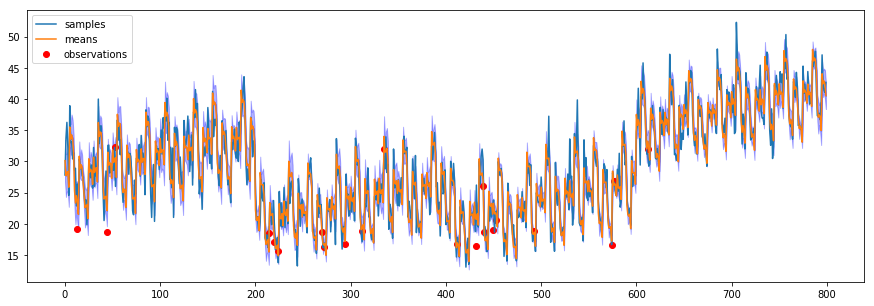

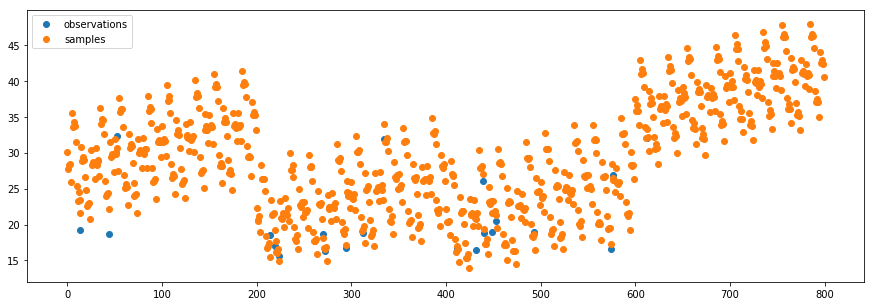

In [11]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 13)
new X is in there: True
new y is in there: True
mean probability is 0.5652173913043478
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 11)
new X is in there: True
new y is in there: True
mean probability is 0.4583333333333333
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 15)
new X is in there: True
new y is in there: True
mean probability is 0.6
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 12)
new X is in there: True
new y is in there: True
mean probability is 0.46153846153846156
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 15)
new X is in there: True
new y is in there: True
mean probability is 0.5555555555555556
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 14)
new X is in there: True
new y is in there: True
mea

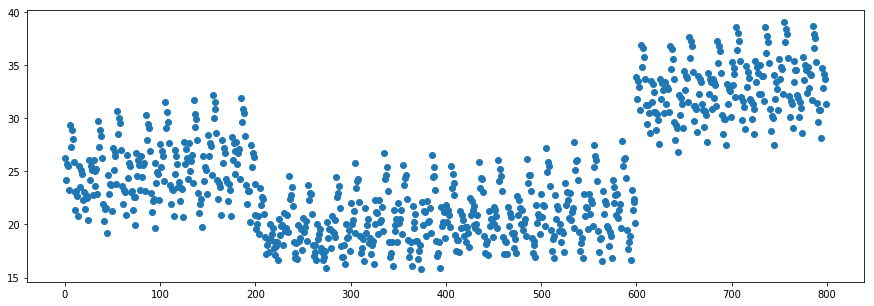

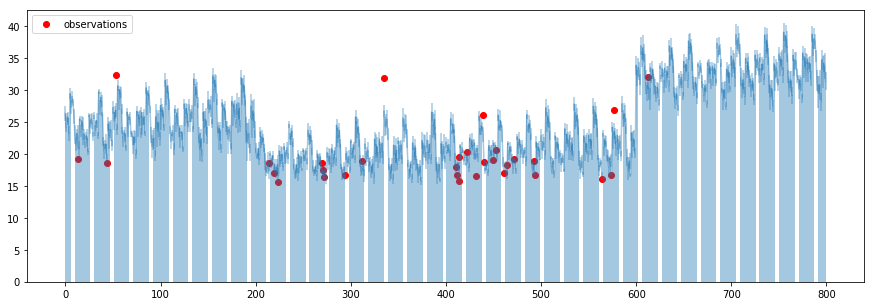

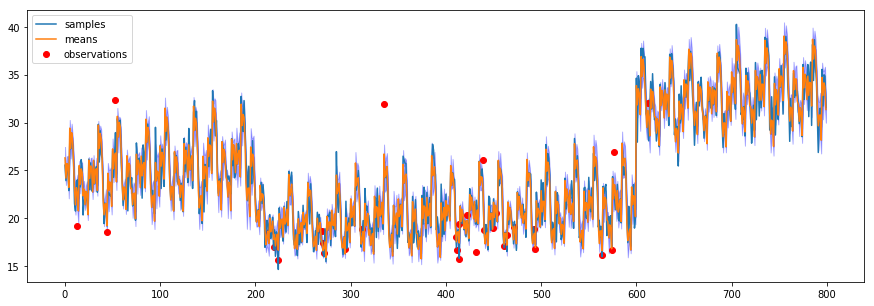

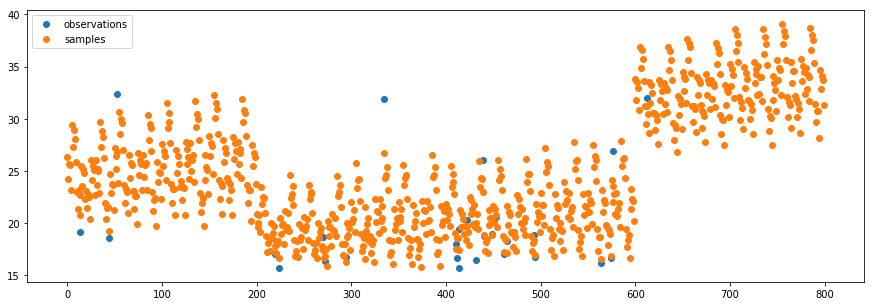

In [12]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 20)
new X is in there: True
new y is in there: True
mean probability is 0.6060606060606061
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 17)
new X is in there: True
new y is in there: True
mean probability is 0.5
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 18)
new X is in there: True
new y is in there: True
mean probability is 0.5142857142857142
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 14)
new X is in there: True
new y is in there: True
mean probability is 0.3888888888888889
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 17)
new X is in there: True
new y is in there: True
mean probability is 0.4594594594594595
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 19)
new X is in there: True
new y is in there: True
mean

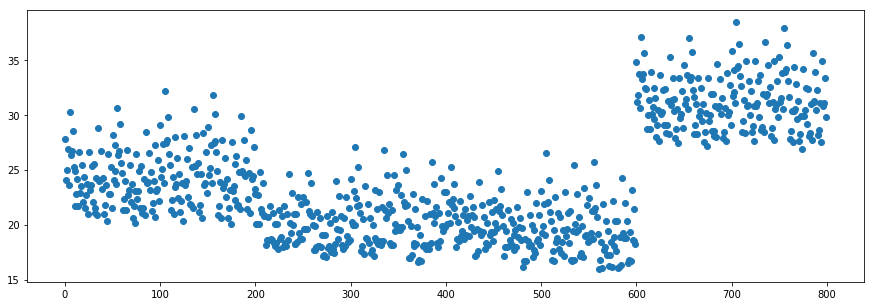

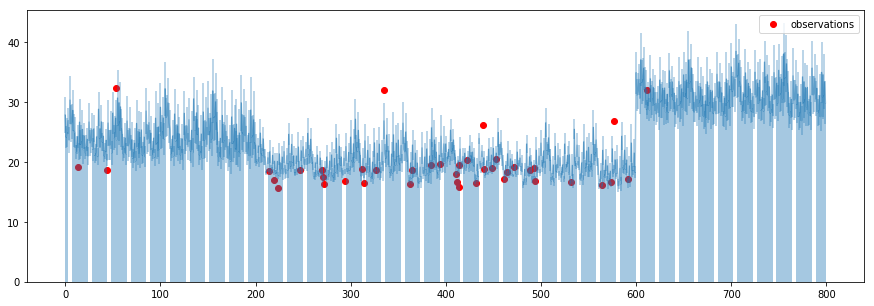

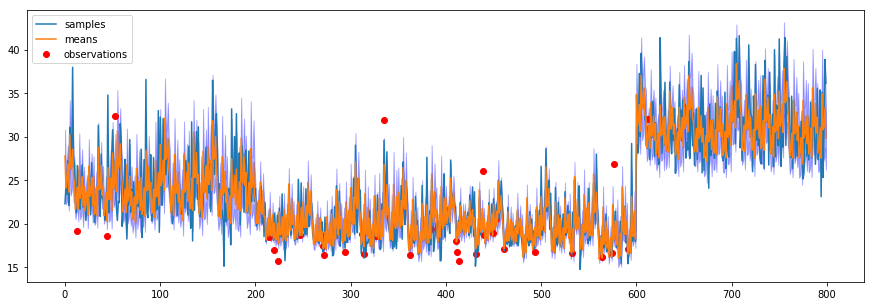

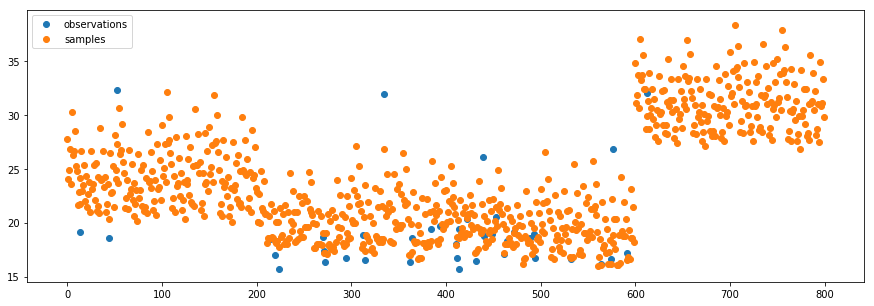

In [13]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 18)
new X is in there: True
new y is in there: True
mean probability is 0.4186046511627907
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 18)
new X is in there: True
new y is in there: True
mean probability is 0.4090909090909091
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 18)
new X is in there: True
new y is in there: True
mean probability is 0.4
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 25)
new X is in there: True
new y is in there: True
mean probability is 0.5434782608695652
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 21)
new X is in there: True
new y is in there: True
mean probability is 0.44680851063829785
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 23)
new X is in there: True
new y is in there: True
mea

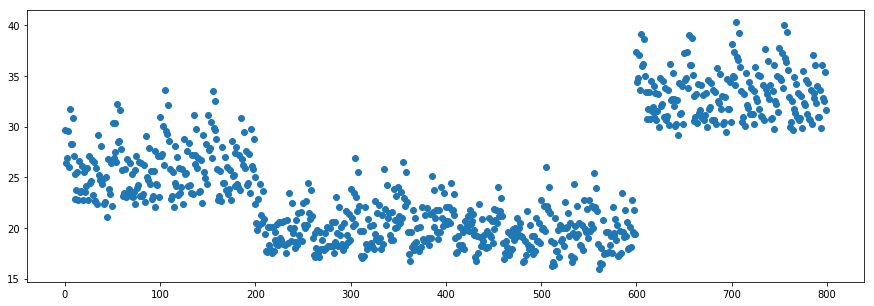

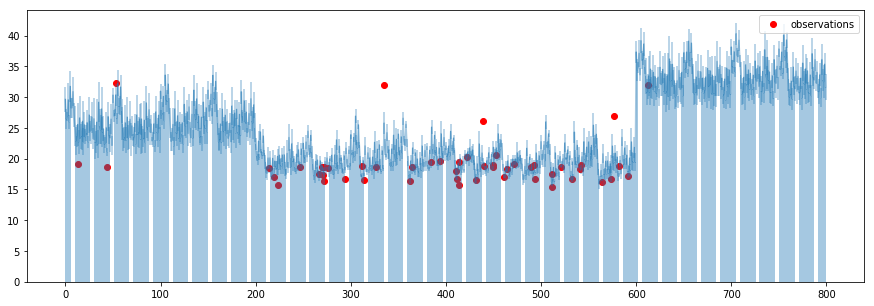

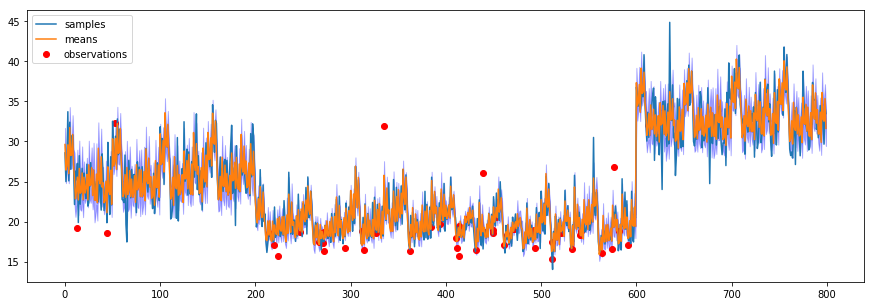

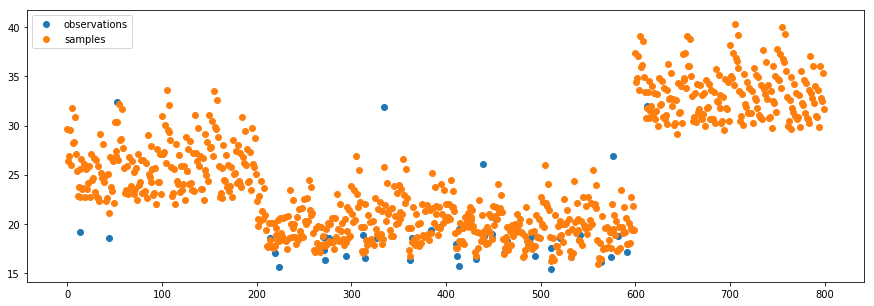

In [14]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 26)
new X is in there: True
new y is in there: True
mean probability is 0.49056603773584906
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 22)
new X is in there: True
new y is in there: True
mean probability is 0.4074074074074074
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 20)
new X is in there: True
new y is in there: True
mean probability is 0.36363636363636365
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 20)
new X is in there: True
new y is in there: True
mean probability is 0.35714285714285715
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 21)
new X is in there: True
new y is in there: True
mean probability is 0.3684210526315789
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 26)
new X is in there: True
new y is i

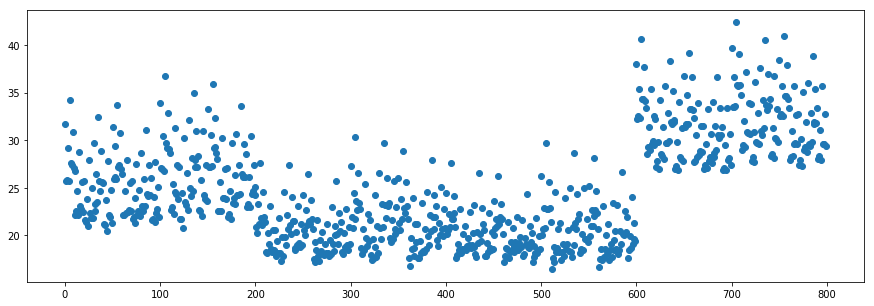

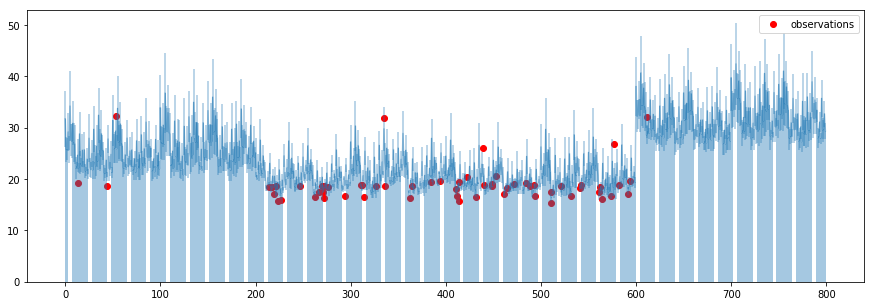

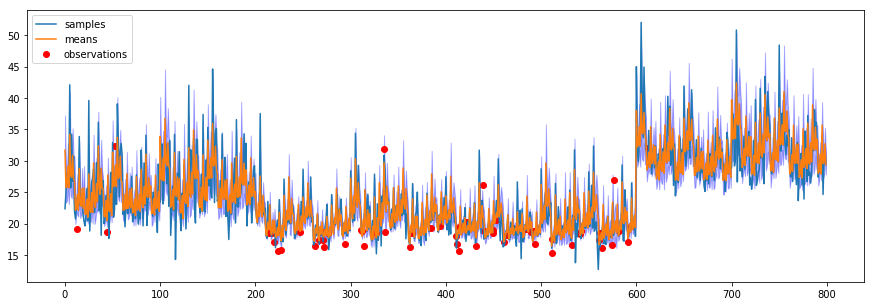

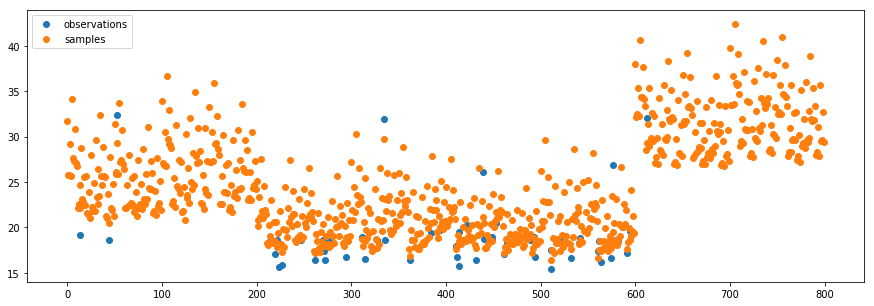

In [15]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 25)
new X is in there: True
new y is in there: True
mean probability is 0.3968253968253968
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 26)
new X is in there: True
new y is in there: True
mean probability is 0.40625
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 26)
new X is in there: True
new y is in there: True
mean probability is 0.4
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 28)
new X is in there: True
new y is in there: True
mean probability is 0.42424242424242425
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 24)
new X is in there: True
new y is in there: True
mean probability is 0.3582089552238806
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 33)
new X is in there: True
new y is in there: True
mean probabili

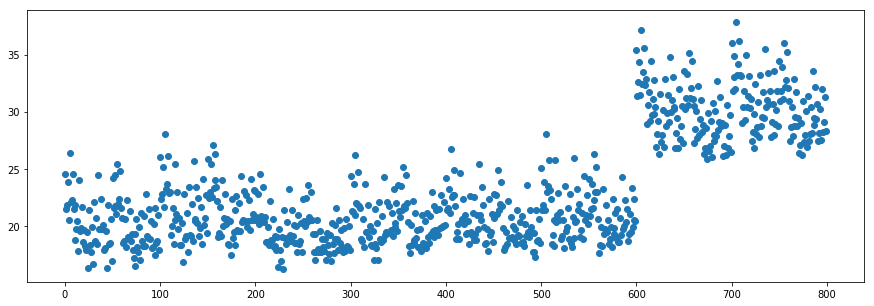

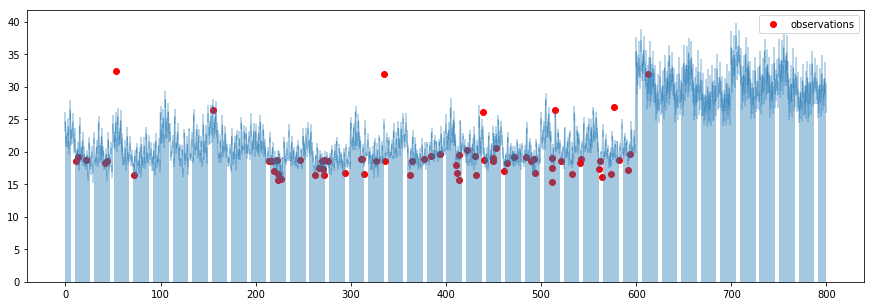

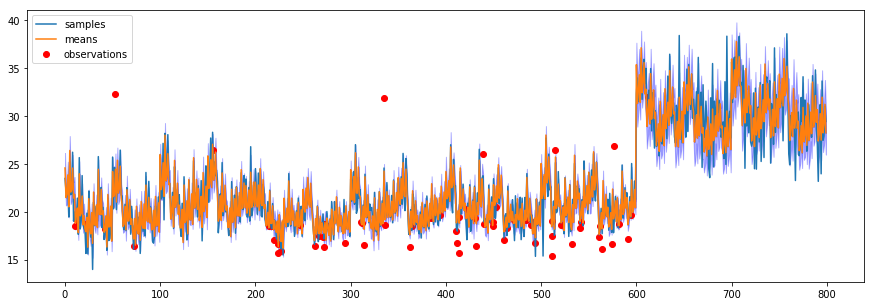

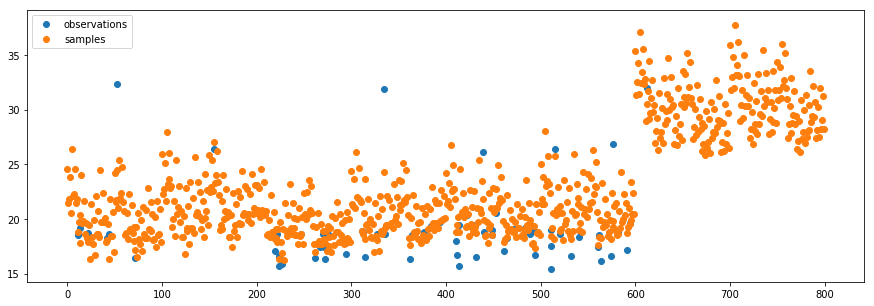

In [16]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 36)
new X is in there: True
new y is in there: True
mean probability is 0.4931506849315068
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 34)
new X is in there: True
new y is in there: True
mean probability is 0.4594594594594595
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 34)
new X is in there: True
new y is in there: True
mean probability is 0.4533333333333333
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 29)
new X is in there: True
new y is in there: True
mean probability is 0.3815789473684211
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 30)
new X is in there: True
new y is in there: True
mean probability is 0.38961038961038963
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 32)
new X is in there: True
new y is in 

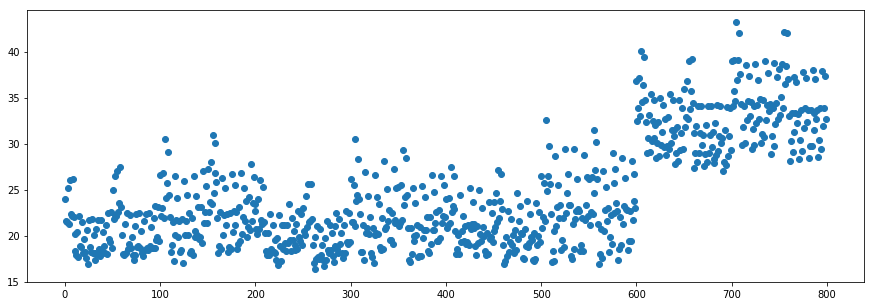

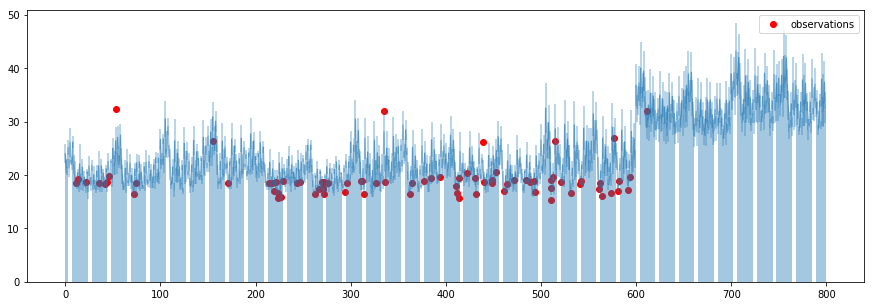

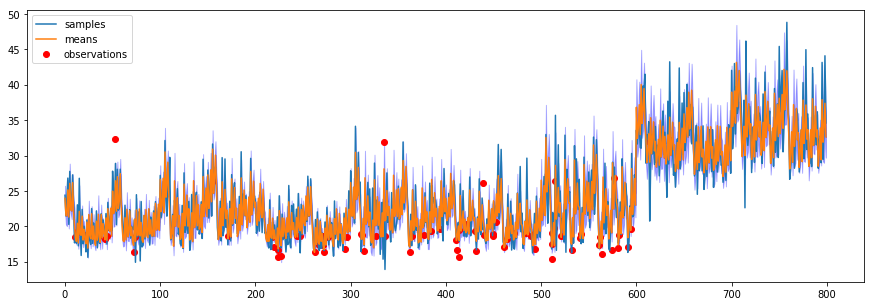

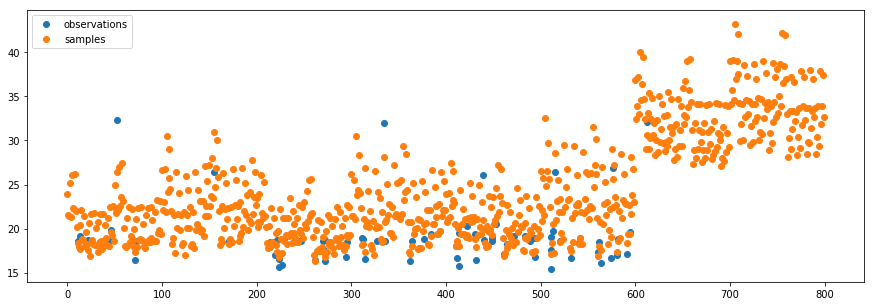

In [17]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 37)
new X is in there: True
new y is in there: True
mean probability is 0.4457831325301205
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 38)
new X is in there: True
new y is in there: True
mean probability is 0.4523809523809524
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 36)
new X is in there: True
new y is in there: True
mean probability is 0.4235294117647059
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 39)
new X is in there: True
new y is in there: True
mean probability is 0.45348837209302323
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 32)
new X is in there: True
new y is in there: True
mean probability is 0.367816091954023
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 35)
new X is in there: True
new y is in t

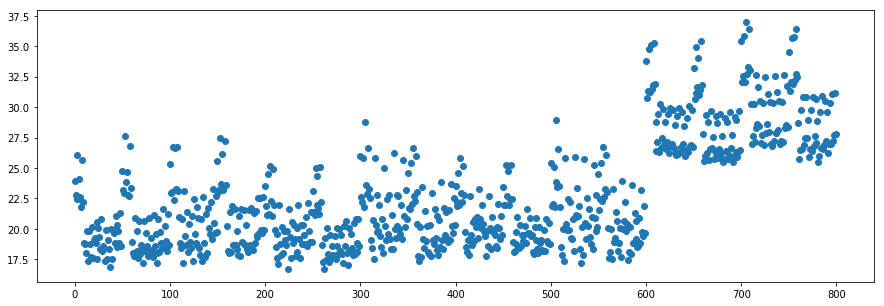

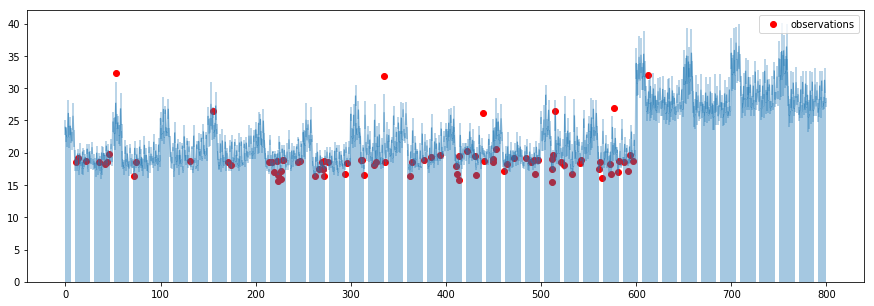

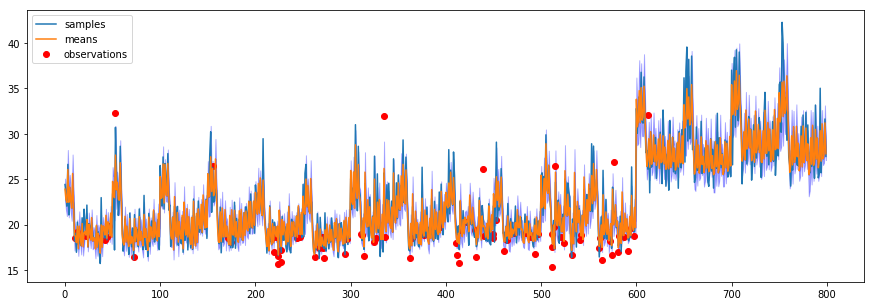

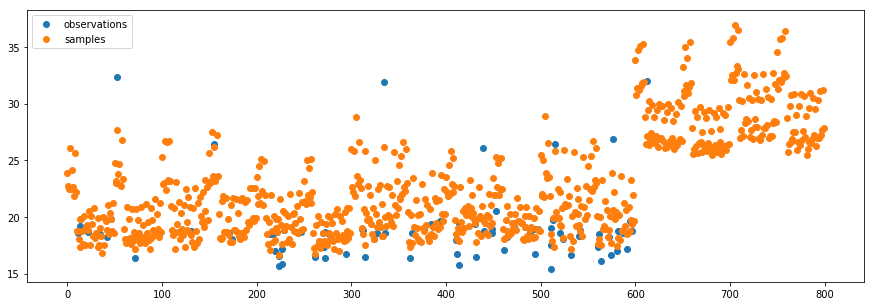

In [18]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 35)
new X is in there: True
new y is in there: True
mean probability is 0.3763440860215054
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 38)
new X is in there: True
new y is in there: True
mean probability is 0.40425531914893614
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 35)
new X is in there: True
new y is in there: True
mean probability is 0.3684210526315789
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 46)
new X is in there: True
new y is in there: True
mean probability is 0.4791666666666667
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 45)
new X is in there: True
new y is in there: True
mean probability is 0.4639175257731959
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 31)
new X is in there: True
new y is in 

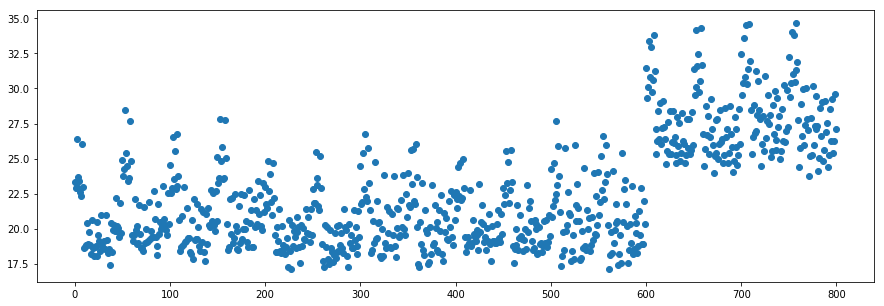

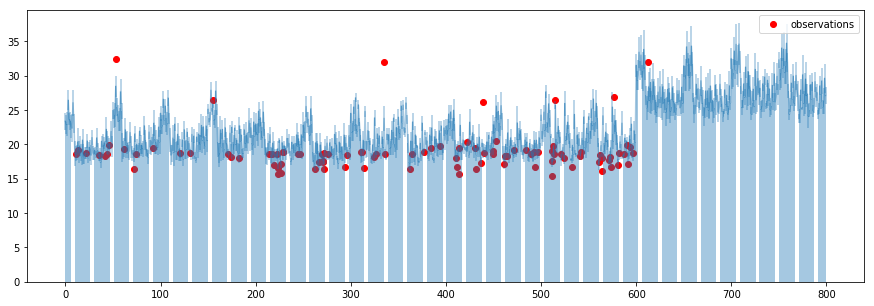

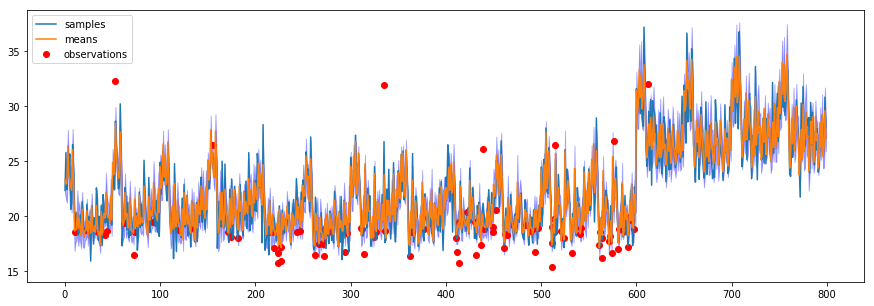

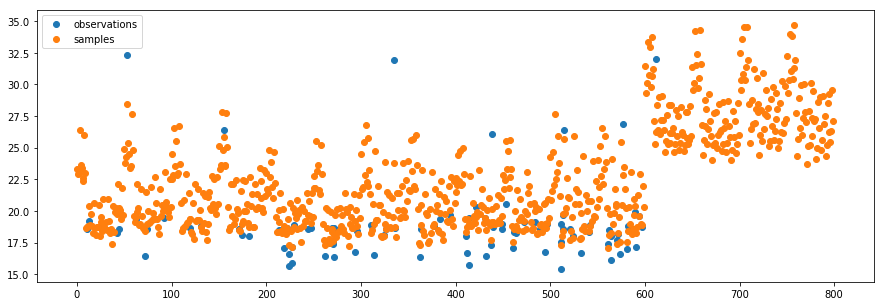

In [19]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 33)
new X is in there: True
new y is in there: True
mean probability is 0.32038834951456313
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 34)
new X is in there: True
new y is in there: True
mean probability is 0.3269230769230769
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 32)
new X is in there: True
new y is in there: True
mean probability is 0.3047619047619048
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 48)
new X is in there: True
new y is in there: True
mean probability is 0.4528301886792453
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 40)
new X is in there: True
new y is in there: True
mean probability is 0.37383177570093457
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 40)
new X is in there: True
new y is in

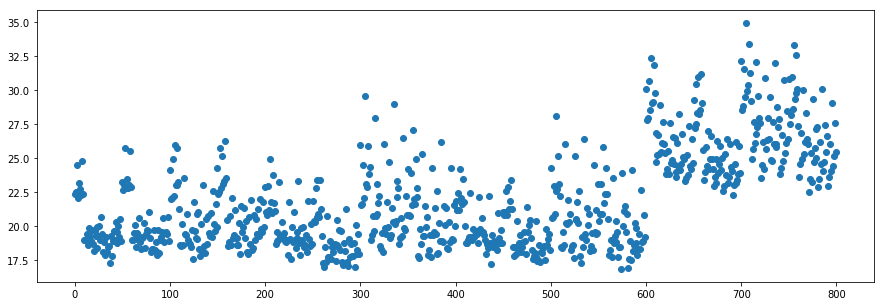

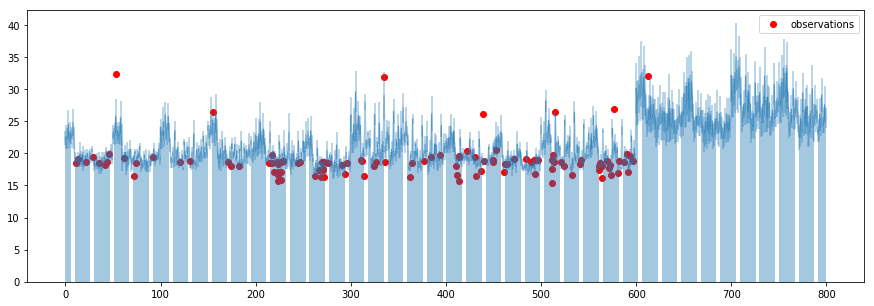

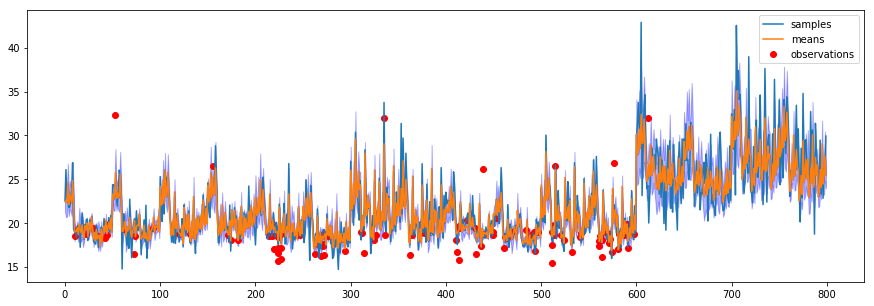

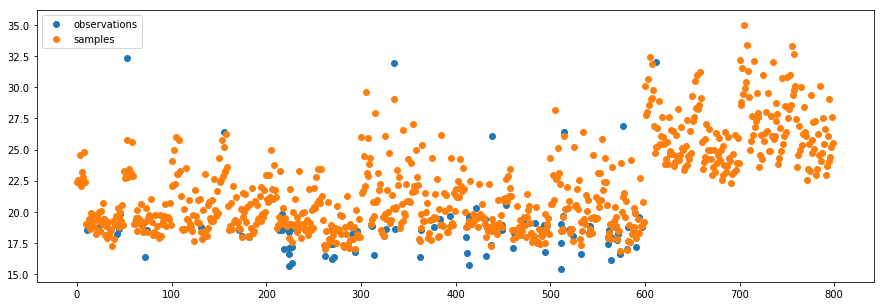

In [20]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 34)
new X is in there: True
new y is in there: True
mean probability is 0.3008849557522124
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 41)
new X is in there: True
new y is in there: True
mean probability is 0.35964912280701755
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 40)
new X is in there: True
new y is in there: True
mean probability is 0.34782608695652173
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 47)
new X is in there: True
new y is in there: True
mean probability is 0.4051724137931034
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 39)
new X is in there: True
new y is in there: True
mean probability is 0.3333333333333333
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 47)
new X is in there: True
new y is in

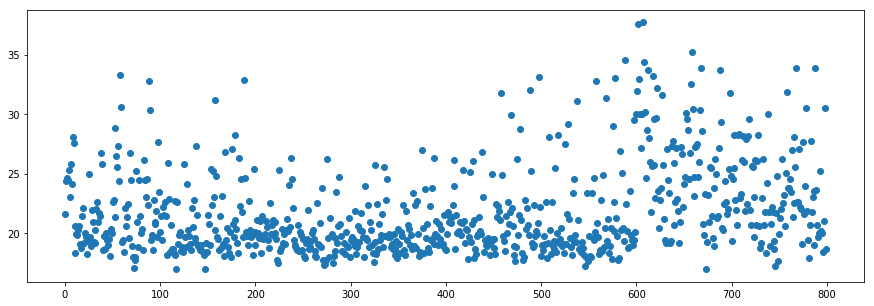

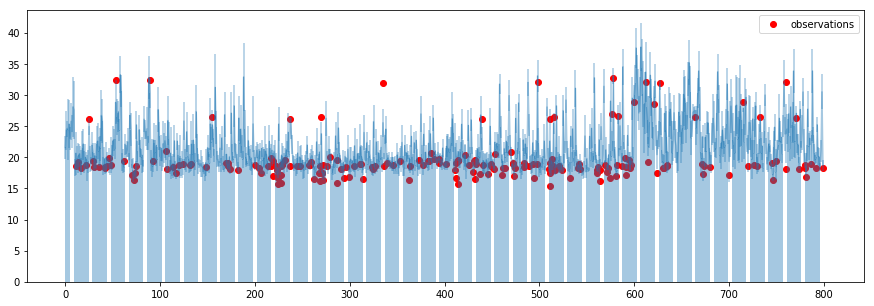

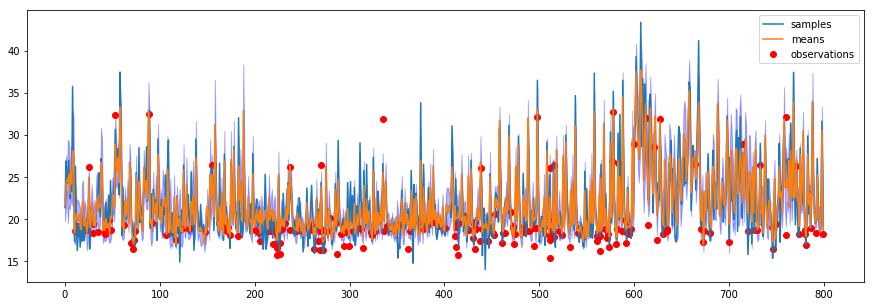

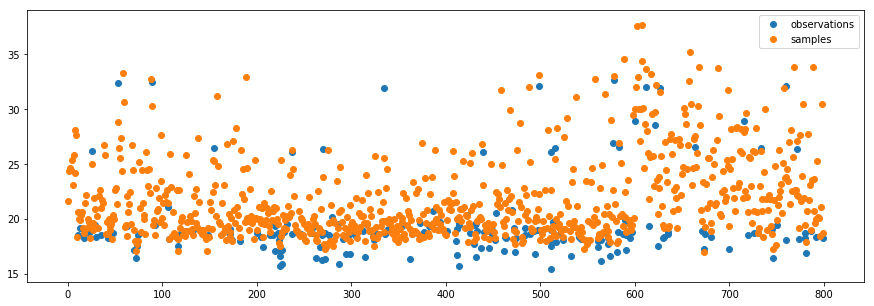

In [21]:
tg.goforit(100)
tg.plot_sample_grid()

In [22]:
tg.get_best_observation()

({'params': {'activations': [<function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>,
    <function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>,
    <function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>],
   'initialisation_scheme': <function tensorflow.contrib.layers.python.layers.initializers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32)>,
   'l2': False,
   'num_neurons': [50, 30, 20],
   'optimizer': tensorflow.python.training.adam.AdamOptimizer,
   'seed': 50},
  'score': 15.388197759615915,
  'X': array([[0],
         [0],
         [1],
         [0],
         [0],
         [1],
         [0],
         [1],
         [0],
         [0],
         [0],
         [1],
         [0],
         [1],
         [0],
         [1],
         [0],
         [0],
         [0],
         [0]], dtype=uint8)},
 {'params': {'activations': [<function tensorflow.python.ops.math_ops.sigmoid(x, name=None)>,
    <function tensorflow.python.ops.math_

In [ ]:
tg.goforit(100)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 62)
new X is in there: True
new y is in there: True
mean probability is 0.29107981220657275
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 62)
new X is in there: True
new y is in there: True
mean probability is 0.2897196261682243
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 63)
new X is in there: True
new y is in there: True
mean probability is 0.2930232558139535
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 65)
new X is in there: True
new y is in there: True
mean probability is 0.30092592592592593
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 67)
new X is in there: True
new y is in there: True
mean probability is 0.3087557603686636
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (20, 58)
new X is in there: True
new y is in